In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ajustes para visualización
sns.set(style="whitegrid")

# Carga de datos
training_data = pd.read_csv('../data/training_detector/03_training_progress.csv')
evaluation_data = pd.read_csv('../data/training_detector/03_evaluation_results.csv')

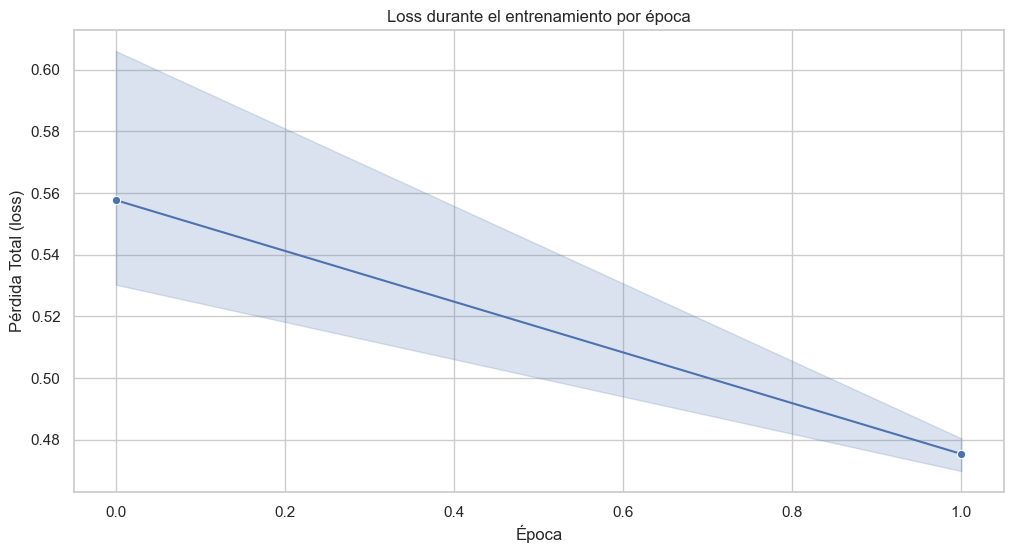

In [6]:
# Análisis de los datos de entrenamiento
# Graficaremos la pérdida total ('loss') a lo largo de las épocas.
plt.figure(figsize=(12, 6))
sns.lineplot(data=training_data, x='epoch', y='loss', marker='o', 
            #  errorbar=None
             )
plt.title('Loss durante el entrenamiento por época')
plt.xlabel('Época')
plt.ylabel('Pérdida Total (loss)')
plt.show()

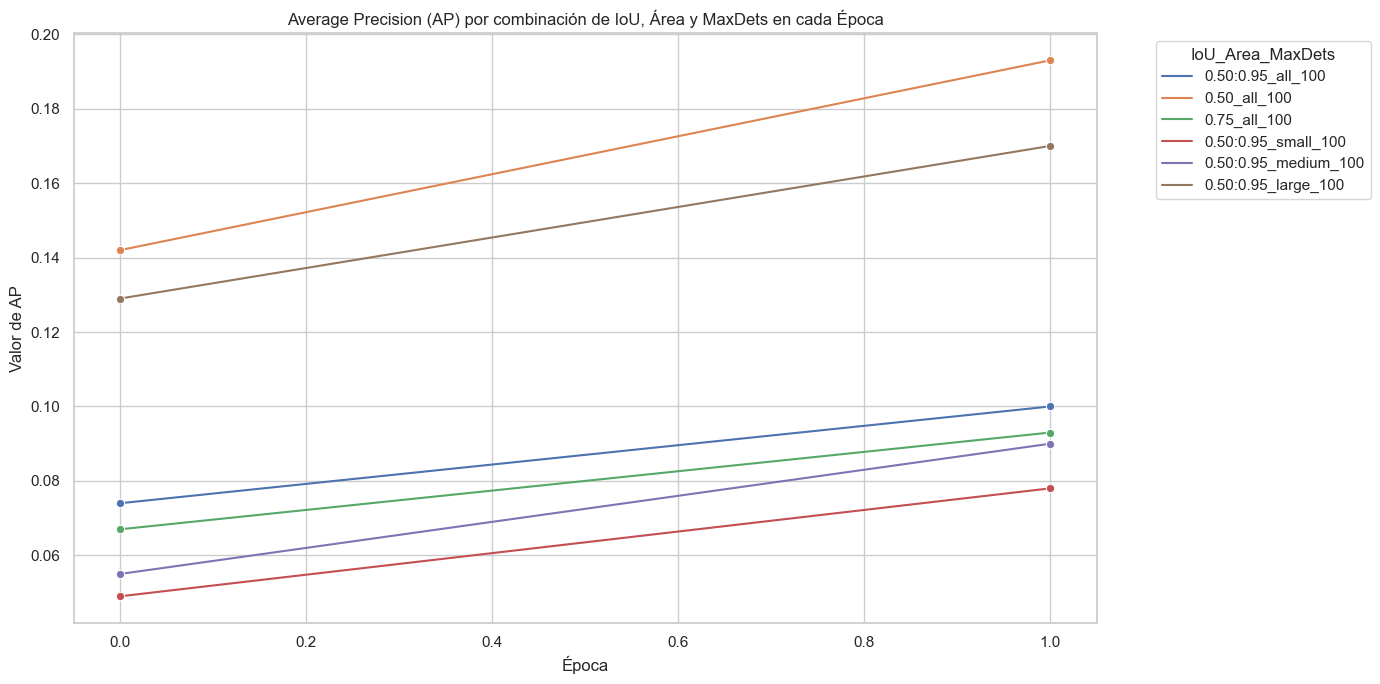

In [ ]:

evaluation_data['IoU_Area_MaxDets'] = evaluation_data.apply(lambda x: f"{x['IoU']}_{x['Area']}_{x['maxDets']}", axis=1)

plt.figure(figsize=(14, 7))
sns.lineplot(data=evaluation_data[evaluation_data['Metric Type'] == 'Precision'],
             x='Epoch', y='Value', hue='IoU_Area_MaxDets', marker='o')

plt.title('Average Precision (AP) por combinación de IoU, Área y MaxDets en cada Época')
plt.xlabel('Época')
plt.ylabel('Valor de AP')
plt.legend(title='IoU_Area_MaxDets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
# Filtrando los datos para Precision con IoU=0.50:0.95 para todas las áreas
filtered_data = evaluation_data[(evaluation_data['Metric Type'] == 'Precision') & (evaluation_data['IoU'] == '0.50:0.95')]

# Calculando el mAP (Promedio de Precisiones Promedio) para cada época
mAP_per_epoch = filtered_data.groupby('Epoch')['Value'].mean()

print(mAP_per_epoch)

Epoch
0    0.07675
1    0.10950
Name: Value, dtype: float64


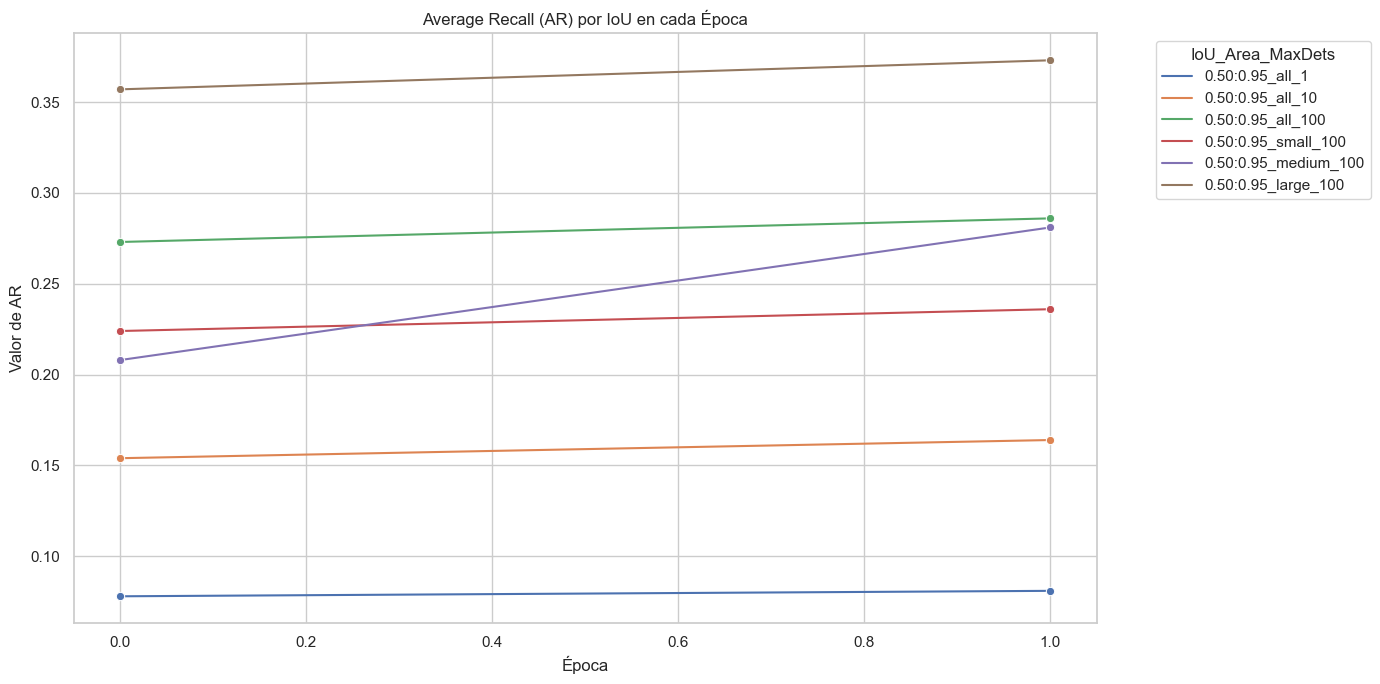

In [13]:
# Ahora, creamos el gráfico de líneas usando esta nueva columna para el argumento 'hue'.
plt.figure(figsize=(14, 7))
sns.lineplot(data=evaluation_data[evaluation_data['Metric Type'] == 'Recall'],
             x='Epoch', y='Value', hue='IoU_Area_MaxDets', marker='o')

plt.title('Average Recall (AR) por IoU en cada Época')
plt.xlabel('Época')
plt.ylabel('Valor de AR')
plt.legend(title='IoU_Area_MaxDets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta el layout para que la leyenda no cubra el gráfico
plt.show()
